# STDSR23. Assignment 2. Task 1
> Anna Startseva, @asleepann, BS19-DS, a.startseva@innopolis.university

## Short problem statement

$n = 116$ one-liter water samples from sites identified as having a heavy environmental impact from birds (seagulls) and waterfowl.

Out of these samples, $x = 17$ samples contained Giardia cysts.

Let $θ$ denote the true probability that a one-liter water sample from this type of site contains Giardia cysts.

## Question 1

What is the conditional distribution of $X$, the number of samples containing Giardia cysts, given $\theta$?

### Answer 1

Conditional distribution of $X$ given $θ$ is $Binomial(116, θ)$ because water samples are independent of each other, probability of water sample to contain Giardia cysts is $θ$, and number of samples is $n = 116$.

## Question 2

Before the experiment, the NIWA scientists elicited that the expected value of $θ$ is 0.2 with a standard deviation of 0.16. Determine the parameters $α$ and $β$ of a Beta prior distribution for $θ$ with this prior mean and standard deviation. (Round $α$ and $β$ to the nearest integer)

### Answer 2

Since $Beta$ distribution with parameters $α$ and $β$ has the following mean $\frac{α}{α + β}$ and variance $\frac{αβ}{(α + β)^2(α + β + 1)}$ and given initial scientists approximations of them ($0.2$ and $0.16^2$ respectively), we can find $α$ and $β$ by solving the following system of equations:

\begin{equation}
\begin{cases}
\frac{α}{α + β} = 0.2 \\
\frac{αβ}{(α + β)^2(α + β + 1)} = 0.16^2
\end{cases}
\end{equation}

By rearranging the equations we get:
\begin{equation}
\begin{cases}
α = 0.2α + 0.2β \\
αβ = 0.0256(α + β)^2(α + β + 1)
\end{cases}
\end{equation}
The first equation gives as $4α = β$. Then by replacing $β$ in the second equation we get:
\begin{equation}
4α^2 = 0.0256(5α)^2(5α + 1)
\end{equation}
Solving this we obtain the following results:
\begin{equation}
\begin{cases}
α \approx 1 \\
β \approx 4
\end{cases}
\end{equation}

Hence, prior distribution for $\theta$ is $Beta(1, 4)$.

## Question 3
Find the posterior distribution of $θ$ and summarize it by its posterior mean and standard deviation.

### Answer 3

Prior distribution for $\theta$ is $Beta(1, 4)$ and Conditional distribution of $X$ given $θ$ is $Binomial(116, θ)$. From problem statement we know that $x = 17$ samples contained Giardia cysts, thus, the posterior distribution is also $Beta(α', β')$ distribution, where
$$α' = α + x$$
$$β' = β + n - x$$
Substitution yeilds
$$α' = 1 + 17 = 18$$
$$β' = 4 + 116 - 17 = 103$$
Hence, posterior distribution of $θ$ is $Beta(18, 103)$.

Mean of this distribution is
$$\frac{α'}{α' + β'} = \frac{18}{121} \approx 0.15$$
Standard deviation is
$$\sqrt{\frac{α'β'}{(α' + β')^2(α' + β' + 1)}} = \sqrt{\frac{1854}{14641 * 122}} \approx 0.03$$

## Question 4
Plot the prior, posterior and normalized likelihood.

### Answer 4

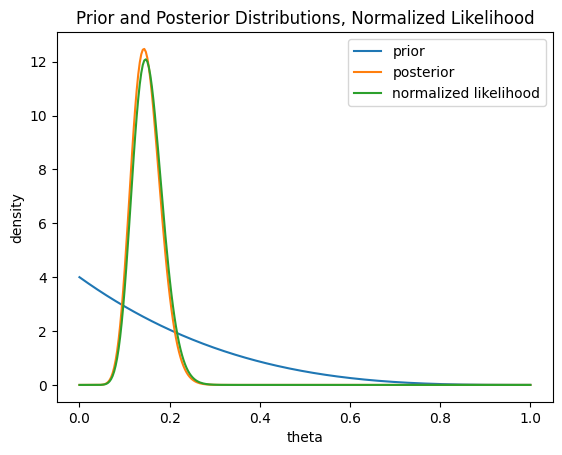

In [1]:
import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt

# parameters
n = 116
x = 17
# prior
a = 1
b = 4
# posterior
a1 = a + x
b1 = b + n - x

theta = np.linspace(0, 1, 300)

# calculate distributions
prior = beta.pdf(theta, a, b)
posterior = beta.pdf(theta, a1, b1)

# calculate normalized likelihood
likelihood_norm = binom.pmf(x, n, theta) * n

# plot distributions
plt.plot(theta, prior, label='prior')
plt.plot(theta, posterior, label='posterior')

# plot normalized likelihood
plt.plot(theta, likelihood_norm, label='normalized likelihood')
plt.title('Prior and Posterior Distributions, Normalized Likelihood')
plt.xlabel('theta')
plt.ylabel('density')
plt.legend()

plt.show()

## Question 5
Find the posterior probability that $θ < 0.1$.

### Answer 5

We can use cumulative distribution function (CDF) to calculate posterior probability of $θ < 0.1$.

In [2]:
theta_bound = 0.1
post_prob = beta.cdf(theta_bound, a1, b1)
print('Posterior probabitlity for θ < 0.1 is', post_prob)

Posterior probabitlity for θ < 0.1 is 0.053094376993042654


## Question 6
Find a central 95% posterior credible interval for $θ$.

### Answer 6

Centered 95% posterior credible interval is from 2.5% to 97.5% quantiles. We can use Percent Point Function (PPF) to find it.

In [3]:
# compute quantiles
q025 = beta.ppf(0.025, a1, b1)
q975 = beta.ppf(0.975, a1, b1)

# Print the 95% credible interval
print('Central 95% posterior credible interval for θ is', [q025, q975])

Central 95% posterior credible interval for θ is [0.09138957252823, 0.21710689824337648]
